In [1]:
import io
import sys
import warnings
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from AutoML import AutomatedRegression

In [2]:
# TODO add more data where pulse compression is performed?

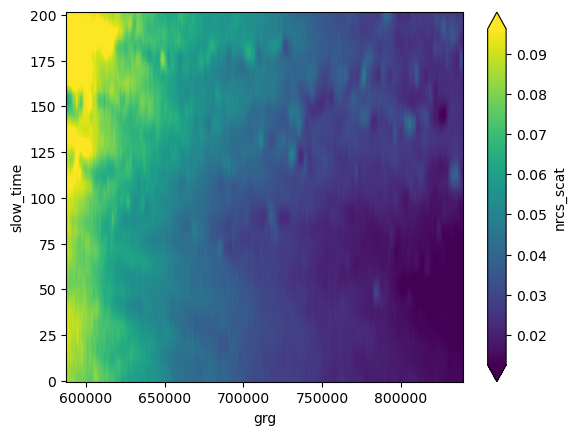

In [6]:
data = xr.open_dataset('scatt4ML.nc')
data = data.dropna(dim= 'slow_time', how = 'all').dropna(dim='grg', how='any')
data.nrcs_scat.T.plot(robust=True)

In [12]:
n = 15
X = xr.concat([data.nrcs_scat.isel(slow_time=slice(i-n, 1+i+n)) for i in range(n, len(data.nrcs_scat['slow_time'])-n)], dim='placeholder').values.reshape(-1, 2*n+1)
y = xr.concat([data.V_leakage_pulse_rg.isel(slow_time=i) for i in range(n, len(data.V_leakage_pulse_rg['slow_time'])-n)], dim='placeholder').values.reshape(-1)

In [13]:
ML = AutomatedRegression(
    X=X,
    y=y,
    n_trial=50,
    models_to_optimize=['bayesianridge', 'lightgbm'],
    write_folder='/Users/opodriscoll/Documents/Scripts/DopSCA/Sentinel1_analyses/ML_analyses/n_15_V/',
)

/Users/opodriscoll/Documents/Scripts/DopSCA/src/automl/AutoML/automl.py:236: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_columns = (~self.X.applymap(np.isreal).any(axis = 0))


In [14]:

# hideous warning catcher
with warnings.catch_warnings(record=True) as caught_warnings:
    output_buffer = io.StringIO()
    sys.stdout = output_buffer

    result = ML.apply()
    
sys.stdout = sys.__stdout__

[I 2023-11-16 14:58:12,379] A new study created in RDB with name: regression_bayesianridge
[I 2023-11-16 14:58:14,354] Trial 0 finished with value: -0.48793705916699937 and parameters: {'scaler': 'minmax', 'n_iter': 71, 'tol': 15.59945204206032, 'alpha_1': 3.809220577048033e-08, 'alpha_2': 4.589458612326476, 'lambda_1': 0.010260065124896783, 'lambda_2': 0.12042752972516813, 'transformers': 'quantile_trans', 'n_quantiles': 3400}. Best is trial 0 with value: -0.48793705916699937.
[I 2023-11-16 14:58:25,209] Trial 1 finished with value: -0.4879669194639387 and parameters: {'scaler': 'robust', 'n_iter': 215, 'tol': 43.19450186989213, 'alpha_1': 8.171304639059403e-06, 'alpha_2': 0.013137990612765096, 'lambda_1': 2.4827821051950883e-07, 'lambda_2': 8.345387083873532e-06, 'transformers': 'quantile_trans', 'n_quantiles': 3200}. Best is trial 0 with value: -0.48793705916699937.
[I 2023-11-16 14:58:27,517] Trial 2 finished with value: 0.7282577516859942 and parameters: {'scaler': 'standard', 'n_

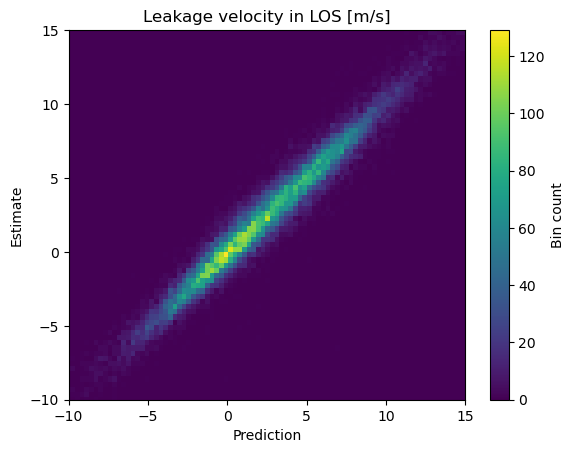

{'bayesianridge_best': [[1.259539524060005, 0.01717479144470316],
  [0.7252637677868312, 0.004793057479791764]],
 'lightgbm_best': [[0.5990125985323641, 0.006099817802912508],
  [0.9535877241503083, 0.0016485416612374187]],
 'stacked': [[0.5840927653963982, 0.00890891821954078],
  [0.9558498423470665, 0.0013985679946966734]]}

In [23]:
plt.hist2d(ML.y_pred, np.ravel(ML.y_test.values), bins=(200,200)) #, gridsize=10, cmap='Blues', edgecolors='gray', mincnt=1)
plt.xlim([-10, 15]); plt.ylim([-10, 15])
plt.colorbar(label='Bin count')
plt.title('Leakage velocity in LOS [m/s]')
plt.xlabel('Prediction')
plt.ylabel('Estimate')
plt.show()

ML.summary

In [21]:
n = 5
X = xr.concat([data.nrcs_scat.isel(slow_time=slice(i-n, 1+i+n)) for i in range(n, len(data.nrcs_scat['slow_time'])-n)], dim='placeholder').values.reshape(-1, 2*n+1)
y = xr.concat([data.V_leakage_pulse_rg.isel(slow_time=i) for i in range(n, len(data.V_leakage_pulse_rg['slow_time'])-n)], dim='placeholder').values.reshape(-1)

ML2 = AutomatedRegression(
    X=X,
    y=y,
    n_trial=50,
    models_to_optimize=['bayesianridge', 'lightgbm'],
    write_folder='/Users/opodriscoll/Documents/Scripts/DopSCA/Sentinel1_analyses/ML_analyses/n_5_V/',
)

# hideous warning catcher
with warnings.catch_warnings(record=True) as caught_warnings:
    output_buffer = io.StringIO()
    sys.stdout = output_buffer

    result = ML2.apply()
    
sys.stdout = sys.__stdout__

/Users/opodriscoll/Documents/Scripts/DopSCA/src/automl/AutoML/automl.py:236: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_columns = (~self.X.applymap(np.isreal).any(axis = 0))
[I 2023-11-16 15:30:54,574] A new study created in RDB with name: regression_bayesianridge
[I 2023-11-16 15:30:56,412] Trial 0 finished with value: -0.7390508198044177 and parameters: {'scaler': 'minmax', 'n_iter': 71, 'tol': 15.59945204206032, 'alpha_1': 3.809220577048033e-08, 'alpha_2': 4.589458612326476, 'lambda_1': 0.010260065124896783, 'lambda_2': 0.12042752972516813, 'transformers': 'quantile_trans', 'n_quantiles': 3400}. Best is trial 0 with value: -0.7390508198044177.
[I 2023-11-16 15:31:06,581] Trial 1 finished with value: -0.7390811010686231 and parameters: {'scaler': 'robust', 'n_iter': 215, 'tol': 43.19450186989213, 'alpha_1': 8.171304639059403e-06, 'alpha_2': 0.013137990612765096, 'lambda_1': 2.4827821051950883e-07, 'lambda_2': 8.345387083873532e-06,

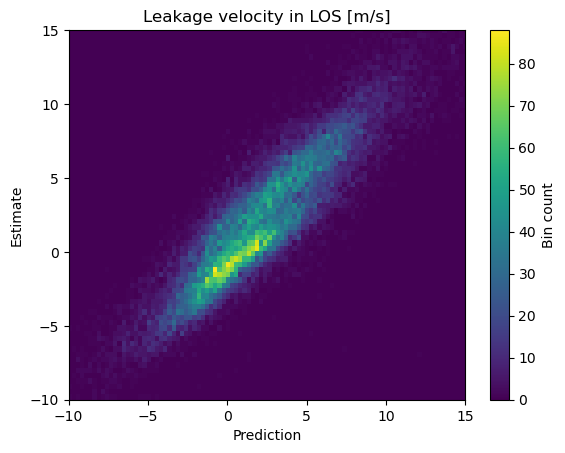

{'bayesianridge_best': [[1.6965574948155606, 0.018917617365346813],
  [0.6075947122337529, 0.006330493964546258]],
 'lightgbm_best': [[1.4092781002490085, 0.016931855477202856],
  [0.7976514026502601, 0.0036824128869723744]],
 'stacked': [[1.3462457072461025, 0.015041901455711354],
  [0.8154682013583644, 0.005548763925790694]]}

In [22]:
plt.hist2d(ML2.y_pred, np.ravel(ML2.y_test.values), bins=(200,200)) #, gridsize=10, cmap='Blues', edgecolors='gray', mincnt=1)
plt.xlim([-10, 15]); plt.ylim([-10, 15])
plt.colorbar(label='Bin count')
plt.title('Leakage velocity in LOS [m/s]')
plt.xlabel('Prediction')
plt.ylabel('Estimate')
plt.show()

ML2.summary